In [552]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import math
from PIL import Image

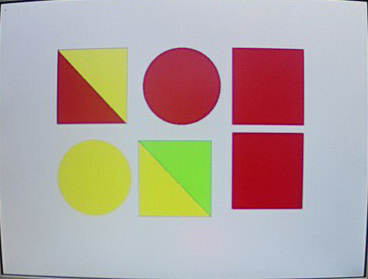

In [553]:
# image = Image.open('/content/24.jpg')
# image = Image.open('/content/Untitled.jpg')
image = Image.open('/content/Untitled2.jpg')
image

In [554]:
# n_samples_num = 1000
centers_num = 8

In [555]:
data = np.array(image)
data.shape

(279, 368, 3)

In [556]:
# 去除出现次数最多的颜色，因为出现次数最多的颜色肯定是背景颜色
r_list,r_label = np.unique(np.array(data[:,2])[:,0],return_counts=True)
g_list,g_label = np.unique(np.array(data[:,2])[:,1],return_counts=True)
b_list,b_label = np.unique(np.array(data[:,2])[:,2],return_counts=True)


# 去除出现最多颜色的左和右+-5
limit = 50
r_limit_left,r_limit_right = r_list[np.argmax(r_label)]-limit,r_list[np.argmax(r_label)]+limit
g_limit_left,g_limit_right = g_list[np.argmax(g_label)]-limit,g_list[np.argmax(g_label)]+limit
b_limit_left,b_limit_right = b_list[np.argmax(b_label)]-limit,b_list[np.argmax(b_label)]+limit
if r_limit_left<0:
  r_limit_left=0

if g_limit_left<0:
  g_limit_left=0

if b_limit_left<0:
  b_limit_left=0


if r_limit_right>255:
  r_limit_right=255
if g_limit_right>255:
  g_limit_right=255
if b_limit_right>255:
  b_limit_right=255

print(r_limit_left,r_limit_right)
print(g_limit_left,g_limit_right)
print(b_limit_left,b_limit_right)

# print(r_label,np.argmax(r_label))

123 223
120 220
128 228


In [557]:
# data[0][0] = np.array([255,255,255])

In [558]:
for i in range(data.shape[0]):
  for j in range(data.shape[1]):
    if data[i][j][0] >= r_limit_left and data[i][j][0] <=r_limit_right and data[i][j][1] >= g_limit_left and data[i][j][1] <=g_limit_right and data[i][j][2] >= b_limit_left and data[i][j][2] <=b_limit_right:
      data[i][j] = np.array([0,0,0])

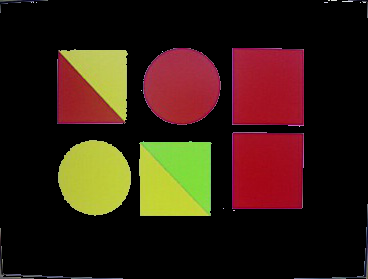

In [559]:
Image.fromarray(np.uint8(data))

In [560]:
# 随机创建几个点
centers = []
for i in range(centers_num):
  x = np.random.randint(0,data.shape[0])
  y = np.random.randint(0,data.shape[1])
  centers.append((x,y,data[x][y]))
centers

[(102, 310, array([0, 0, 0], dtype=uint8)),
 (82, 95, array([190, 198,  89], dtype=uint8)),
 (171, 82, array([186, 197,  56], dtype=uint8)),
 (11, 89, array([0, 0, 0], dtype=uint8)),
 (243, 265, array([0, 0, 0], dtype=uint8)),
 (275, 294, array([0, 0, 0], dtype=uint8)),
 (82, 194, array([167,  42,  60], dtype=uint8)),
 (247, 169, array([0, 0, 0], dtype=uint8))]

In [561]:
centers # 此即为选择的质心

[(102, 310, array([0, 0, 0], dtype=uint8)),
 (82, 95, array([190, 198,  89], dtype=uint8)),
 (171, 82, array([186, 197,  56], dtype=uint8)),
 (11, 89, array([0, 0, 0], dtype=uint8)),
 (243, 265, array([0, 0, 0], dtype=uint8)),
 (275, 294, array([0, 0, 0], dtype=uint8)),
 (82, 194, array([167,  42,  60], dtype=uint8)),
 (247, 169, array([0, 0, 0], dtype=uint8))]

In [562]:
# 计算欧式距离(颜色和颜色之间的差)
def euclid_color_distance(point_one,point_two):
  if point_two.shape[0] == 1:
    point_two = point_two[0]
  return math.sqrt(math.pow(point_one[0] - point_two[0],2) + math.pow(point_one[1] - point_two[1],2) + math.pow(point_one[2] - point_two[2],2))

# 计算欧式距离
def euclid_distance(point_one,point_two):
  return math.sqrt(math.pow(point_one[0] - point_two[0],2) + math.pow(point_one[1] - point_two[1],2))


# 计算传入的列表中最小值的索引
def get_min_index_of_list(min_list):
  # print(min_list)
  min = 0
  for i in range(len(min_list)):
    if min_list[i]<min_list[min]:
      min = i
  return min

In [563]:
# 计算点到质心的距离。
# cs代表质心 points代表点
def calc_distance(cs):
  global data
  # 通过欧式距离计算两个点之间的距离
  global centers_num
  distances = []
  # 创建好列表，存放数据
  for center in range(centers_num):
    distance = []
    distances.append(distance)
    
 # 计算各个点距离质心的欧式距离
  for i in range(data.shape[0]):
    for j in range(data.shape[1]):
      if data[i][j][0] == 0 and data[i][j][1] == 0 and data[i][j][2] == 0:
        continue;
      min_list = []
      # 计算权重 0.5的颜色相似度 * 0.5的欧式距离
      for center in range(centers_num):
        # 计算一次各个点颜色和其他点颜色之间的差别
        color_distance = euclid_color_distance(data[i][j],cs[center][2])
        euclid_dis = euclid_distance([i,j],[cs[center][0],cs[center][1]])
        min_list.append(0.3 * color_distance + 0.7 * euclid_dis)
      # 选择权重计算出来的最低赋予它
      min_index = get_min_index_of_list(min_list)
      distances[min_index].append([i,j,data[i][j],min_list[min_index]])
  # 但是这里有一点问题就是如何去除一些噪点。比如距离很远的噪点。
  # 重新计算一遍欧式距离，对于超过  x > avg(所有x)+(+-)avg(所有x)*0.5 y > avg(y)+(+-)(avg(y)*0.5)
  for i in range(centers_num):
    avg = np.mean(np.array(distances[i])[:,3])
    distances[i] = [bac for bac in distances[i] if bac[3] < avg * 2]
    # for i in range(len(distances[i])):
    #   if distances[i][3] > avg * 2:
    #     distances.
  return distances

In [564]:
# d = calc_distance(centers)

In [565]:
# 重新计算质心
def calc_xy_avg(xys):
  global centers
  l = []
  for i in range(len(xys)):
    x_sum = 0
    y_sum = 0
    color_sum = np.zeros((1,3),dtype=np.int32)
    length = len(xys[i])
    first_color = []
    if length == 0:
      x_sum = centers[i][0]
      y_sum = centers[i][1]
      first_color = centers[i][2]
    else:
      for j in xys[i]:
        x_sum = x_sum + j[0]
        y_sum = y_sum + j[1]
        color_sum = color_sum + np.array(j[2]).reshape(1,3)
      x_sum = int(x_sum / length)
      y_sum = int(y_sum / length)
      color_sum = color_sum / np.full((1,3),length)
      first_color = color_sum
    l.append((x_sum,y_sum,first_color))
  return l

In [566]:
centers[0][2].shape

(3,)

In [567]:
# cd = calc_distance(centers)

In [568]:
x

247

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


[(102, 310, array([0, 0, 0], dtype=uint8)), (82, 95, array([190, 198,  89], dtype=uint8)), (171, 82, array([186, 197,  56], dtype=uint8)), (11, 89, array([0, 0, 0], dtype=uint8)), (243, 265, array([0, 0, 0], dtype=uint8)), (275, 294, array([0, 0, 0], dtype=uint8)), (82, 194, array([167,  42,  60], dtype=uint8)), (247, 169, array([0, 0, 0], dtype=uint8))] 8
[(105, 265, array([[162.1763864 ,  22.85116279,  46.20417412]])), (87, 98, array([[172.58325538, 119.32132834,  67.65528531]])), (160, 117, array([[181.20557449, 201.35686465,  67.47273612]])), (79, 76, array([[146.99067982,  50.19298246,  50.41776316]])), (186, 263, array([[161.74553276,  10.94242224,  33.71475844]])), (260, 354, array([[67.22932331, 73.77443609, 90.89473684]])), (91, 181, array([[162.56587873,  71.63432682,  70.09455293]])), (197, 172, array([[154.13994911, 199.72603902,  61.52586938]]))] 8
[(105, 265, array([[162.1763864 ,  22.85116279,  46.20417412]])), (87, 98, array([[172.58325538, 119.32132834,  67.65528531]])

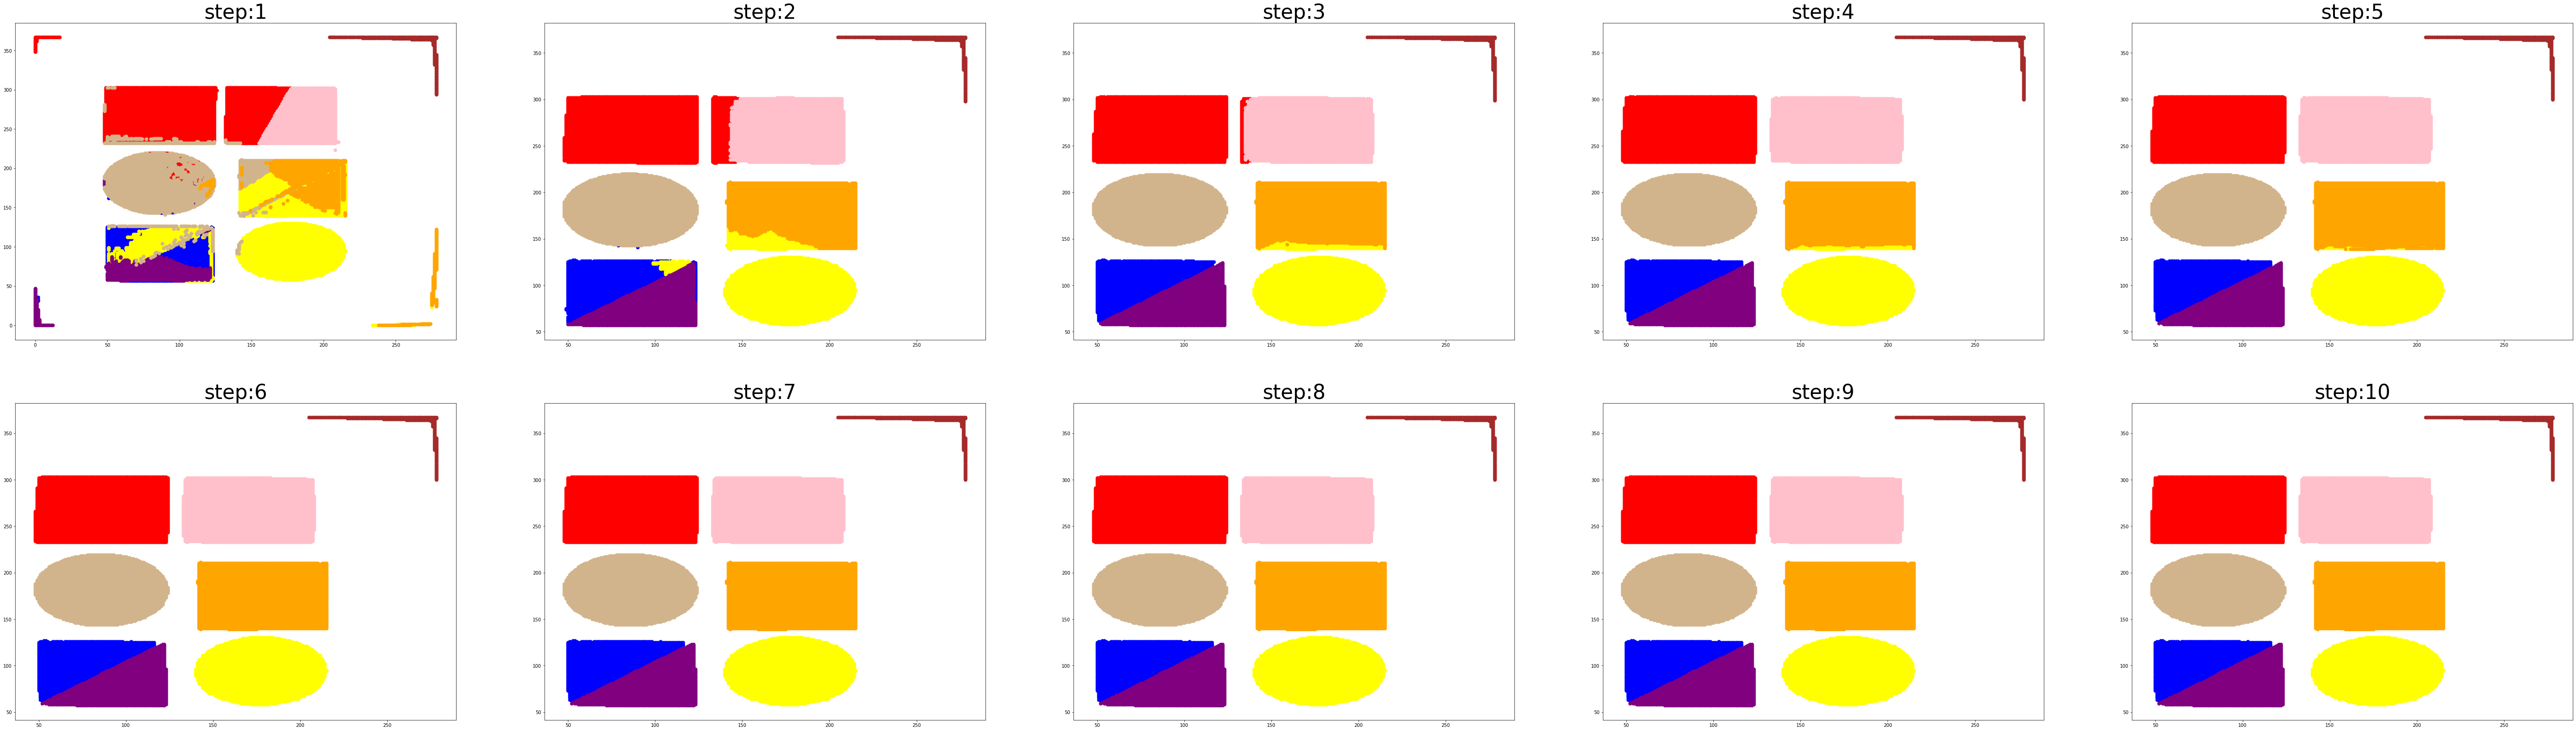

In [569]:
colors = ['red','blue','yellow','purple','pink','brown','tan','orange','grey','olive','black','lime','navy','indigo','wheat','cyan','linen','maroon','snow','moccasin','slateblue','thistle','plum','drakcyan','honeydew']

# 一行显示五个
row_size = 10
col_size = 5

iterate_index = 1

# 从下面开始执行循环，知道小于一个阈值
flag = True
plt.figure(figsize=(100,150))
interator_index = 0 
while flag:
  global centers
  cd = calc_distance(centers)
  # 计算出新的平均数
  cxa = calc_xy_avg(cd)
  correct_num = 0


  #过程可视化代码
  plt.subplot(row_size,col_size,iterate_index)
  iterate_index = iterate_index + 1
  for i in range(len(cd)):
    arr = np.array(cd[i])
    if len(arr) > 0 :
      plt.scatter(arr[:, 0], arr[:, 1], c=colors[i], marker='o', s=50,label=str(i))
      # plt.legend(fontsize=40,title_fontsize=40)
      plt.title('step:%s'%(iterate_index-1),fontdict={'weight':'normal','size': 44})
  #过程可视化代码

  # 计算原始centers和cxa之间的距离，如果小于某一个值就认为结束了。
  print(centers,len(centers))
  print(cxa,len(cxa))
  interator_index = interator_index + 1
  centers = cxa
  if interator_index == 10:
    break
  # for i in range(len(centers)):
  #   if len(centers[i]) >0 and len(cxa[i]) > 0 and euclid_distance(centers[i],cxa[i]) < 0.01:
  #     correct_num = correct_num + 1
  # if correct_num == len(centers):
  #   flag = False
  # else:
  #   centers = cxa

# 代表当前的族群
group = cd
print("完成！")
# print(centers)
# print(group)
# plt.legend(fontsize=40,title_fontsize=40)
plt.show()
# plt.plot()
# plt.subplot(10,10,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


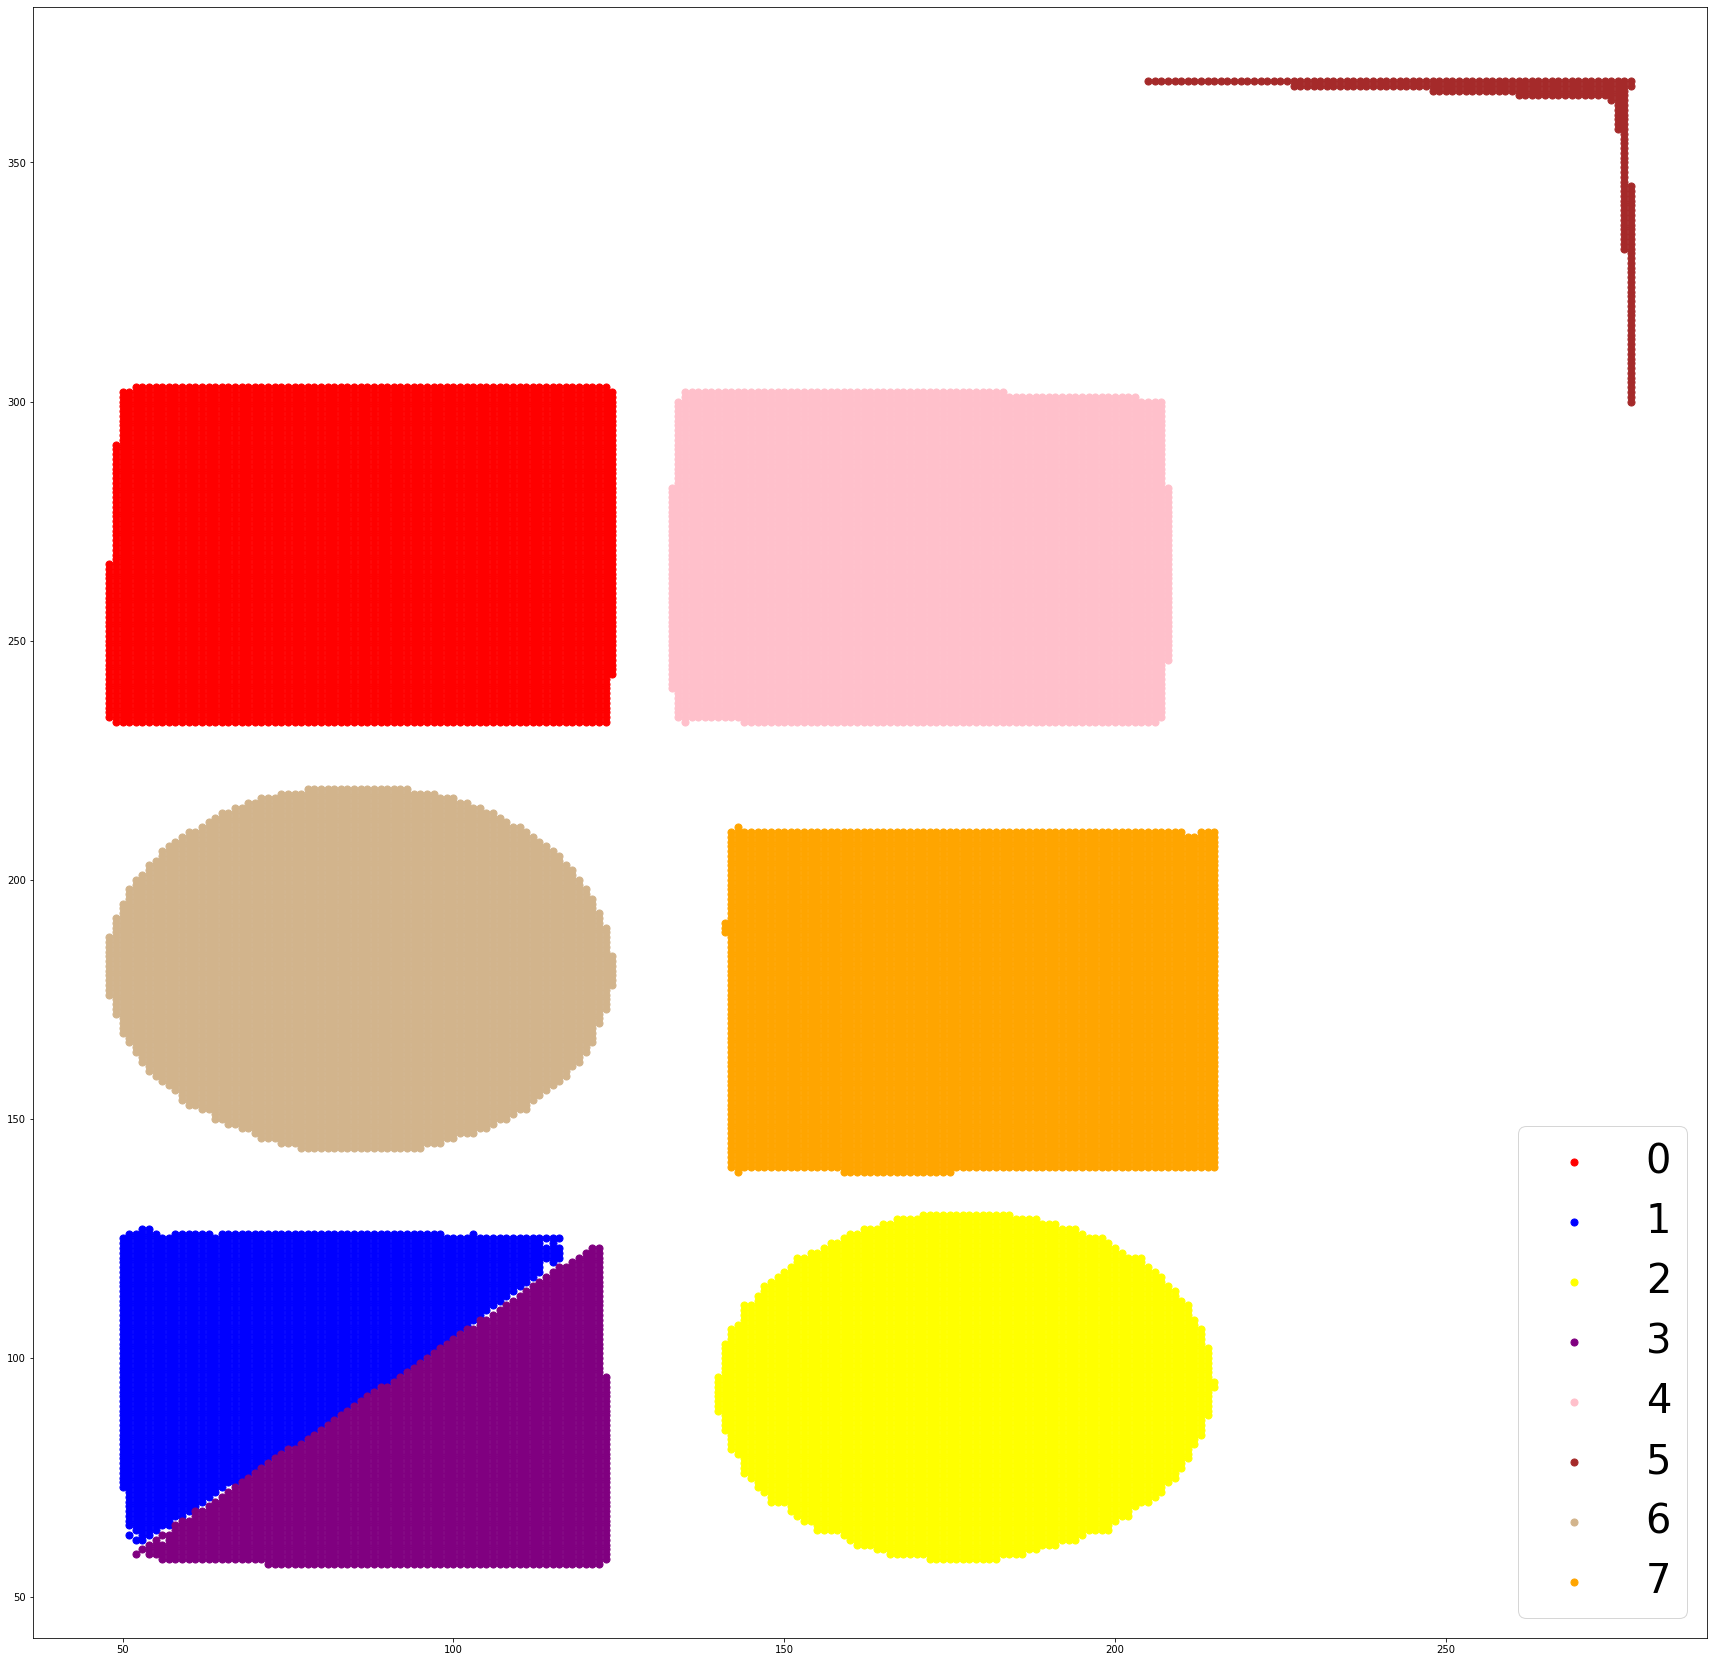

In [570]:
# 单独的结果输出
plt.figure(figsize=(30,30))
colors = ['red','blue','yellow','purple','pink','brown','tan','orange','grey','olive','black','lime','navy','indigo','wheat','cyan','linen','maroon','snow','moccasin','slateblue','thistle','plum','drakcyan','honeydew']
for i in range(len(group)):
  arr = np.array(group[i])
  plt.scatter(arr[:, 0], arr[:, 1], c=colors[i], marker='o', s=50,label=str(i))
plt.legend(fontsize=40,title_fontsize=40)
plt.show()